# Exercícios 

Escolha um dataset de sua preferência com as seguintes características: 

- Dado com um atributo rotulado (target)
- Pelo menos 4 variáveis númericas
- Pelo menos 1 variável categórica


1. Crie um pequeno texto de introdução ao seu dado. Explique a origem do dado e o tipo de problema que o entedimento deste pode proporcionar. No seu texto, tente responder as seguintes questões: 

- Qual a origem do meu dado?
    - Kaggle [Jobs and Salaries in Data Science](https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data)
- Qual é o problema? 
    - Entender a evolução da carreira de ciência de dados e analisar possíveis melhorias de salários e quantidade de vagas para o futuro.
- Qual é a variável ALVO (target)? 
    - Preço
- Porque eu me importo?
    - Isso pode auxiliar compradores e vendedores a estimar o valor aproximado de uma casa em negociação, para analisar se está próximo a um valor justo ou ajudar a definir um preço justos.
- Quais os ganhos possíveis no entendimento do meu dado? 



2. Crie gráficos para estudar a dispersão numérica das variáveis numéricas (histogramas, boxplot, KDE, etc.)

3. Crie gráficos para estudar a frequencia dos valores possíveis observados nas variáveis categóricas (ex: barplots). 

4. Crie gráficos relacionais entre as variaveis numéricas, mas que explicite a variável ALVO do seu dado. 

5. Use o pandas profiling e gere um relatório automático. 




In [19]:
import pandas as pd

df=pd.read_csv('jobs_in_data.csv')

# convert salary_in_usd to BRL
df['salary_in_brl'] = df['salary_in_usd']*5.5
# criei uma nova coluna com o salário mensal com no maximo 2 casas decimais
df['salary_in_brl_per_month'] = (df['salary_in_brl']/12).round(2)
# drop salary_in_usd, salary
df = df.drop(columns=['salary_in_usd', 'salary', 'salary_currency'])

df.head()

,work_year,job_title,job_category,employee_residence,experience_level,employment_type,work_setting,company_location,company_size,salary_in_brl,salary_in_brl_per_month
0,2023,Data DevOps Engineer,Data Engineering,Germany,Mid-level,Full-time,Hybrid,Germany,L,522566.0,43547.17
1,2023,Data Architect,Data Architecture and Modeling,United States,Senior,Full-time,In-person,United States,M,1023000.0,85250.00
2,2023,Data Architect,Data Architecture and Modeling,United States,Senior,Full-time,In-person,United States,M,449900.0,37491.67
3,2023,Data Scientist,Data Science and Research,United States,Senior,Full-time,In-person,United States,M,1166000.0,97166.67
4,2023,Data Scientist,Data Science and Research,United States,Senior,Full-time,In-person,United States,M,513150.0,42762.50


# 2. Crie gráficos para estudar a dispersão numérica das variáveis numéricas (histogramas, boxplot, KDE, etc.)

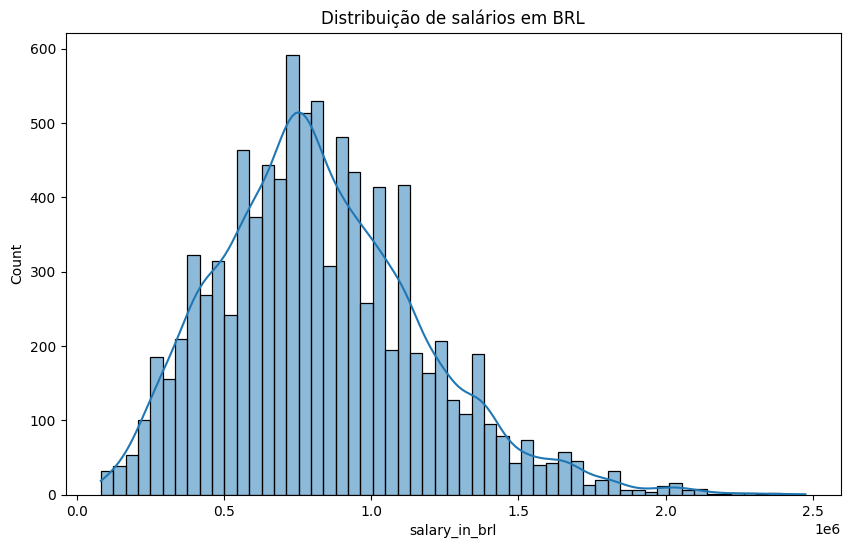

In [17]:
# cria gráfico que mostre a distribuição de salários, mostre os salários no seguinte formado 999.999,99

import matplotlib.pyplot as plt
import seaborn as sns
# df['salary_in_brl'].plot(kind='hist', bins=30, rwidth=0.8, color='b')
# plt.title('Salário em BRL')
# plt.xlabel('Salário')
# plt.ylabel('Número de vagas')
# plt.show()
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_brl'], kde=True)
plt.title('Distribuição de salários em BRL')
plt.show()



In [ ]:

# cria gráfico que mostre a distribuição de salários por nível de experiência
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='experience_level', y='salary_in_brl')
plt.title('Distribuição de salários por nível de experiência')
plt.show()

# cria gráfico que mostre a distribuição de salários por nível de experiência e tipo de contrato
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='experience_level', y='salary_in_brl', hue='contract_type')
plt.title('Distribuição de salários por nível de experiência e tipo de contrato')
plt.show()


# 3. Crie gráficos para estudar a frequencia dos valores possíveis observados nas variáveis categóricas (ex: barplots). 

# 4. Crie gráficos relacionais entre as variaveis numéricas, mas que explicite a variável ALVO do seu dado.

# 5. Use o pandas profiling e gere um relatório automático. 

In [20]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Pandas Profiling Report")

profile.to_file('output.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 346.49it/s]
